In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [93]:
prices_dataset_train =  pd.read_csv('SP500_train.csv')
prices_dataset_test =  pd.read_csv('SP500_test.csv')

#we are after adj closing value column in the dataset
trainingset = prices_dataset_train.iloc[:,5:6].values
testset = prices_dataset_test.iloc[:,5:6].values

prices_dataset_train.head()

,date,open,high,low,close,adj_close,volume
0,2012-01-03,1258.859985,1284.619995,1258.859985,1277.060059,1277.060059,3943710000
1,2012-01-04,1277.030029,1278.729980,1268.099976,1277.300049,1277.300049,3592580000
2,2012-01-05,1277.300049,1283.050049,1265.260010,1281.060059,1281.060059,4315950000
3,2012-01-06,1280.930054,1281.839966,1273.339966,1277.810059,1277.810059,3656830000
4,2012-01-09,1277.829956,1281.989990,1274.550049,1280.699951,1280.699951,3371600000


In [94]:
#we use min-max normalization to normalize the dataset
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
scaled_trainingset = sc.fit_transform(trainingset)
scaled_trainingset


array([[0.00000000e+00],
       [2.41278448e-04],
       [4.02147503e-03],
       ...,
       [9.78082912e-01],
       [9.77419457e-01],
       [9.66933529e-01]])

In [95]:
X_train = [] #50 prev stock prices before the financial day
y_train = []

In [96]:
for i in range(50,1258):
    X_train.append(scaled_trainingset[i-50:i,0]) 
    y_train.append(scaled_trainingset[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)
print(X_train)
print("*********************")
print(y_train)
print(X_train.shape)

[[0.00000000e+00 2.41278448e-04 4.02147503e-03 ... 9.45347308e-02
  1.19528183e-01 1.17849296e-01]
 [2.41278448e-04 4.02147503e-03 7.54026568e-04 ... 1.19528183e-01
  1.17849296e-01 1.26213910e-01]
 [4.02147503e-03 7.54026568e-04 3.65943370e-03 ... 1.17849296e-01
  1.26213910e-01 1.27792408e-01]
 ...
 [8.54000378e-01 8.67170807e-01 8.71885928e-01 ... 9.89182222e-01
  9.92027494e-01 9.97144664e-01]
 [8.67170807e-01 8.71885928e-01 8.68920139e-01 ... 9.92027494e-01
  9.97144664e-01 9.78082912e-01]
 [8.71885928e-01 8.68920139e-01 8.68738996e-01 ... 9.97144664e-01
  9.78082912e-01 9.77419457e-01]]
*********************
[0.12621391 0.12779241 0.13340232 ... 0.97808291 0.97741946 0.96693353]
(1208, 50)


In [97]:
# Reshaping to given input for LSTM
#we have to reshape the dataset (numOfSamples,numOfFeatures,1)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

print(X_train[0])
print('*************')
print(X_train[1])

[[0.        ]
 [0.00024128]
 [0.00402148]
 [0.00075403]
 [0.00365943]
 [0.01510054]
 [0.01550271]
 [0.01853894]
 [0.01209449]
 [0.01669916]
 [0.0311463 ]
 [0.03764095]
 [0.03852568]
 [0.039149  ]
 [0.03779178]
 [0.04926307]
 [0.0415921 ]
 [0.03948073]
 [0.03614296]
 [0.03553976]
 [0.0472824 ]
 [0.04874026]
 [0.06820418]
 [0.06763105]
 [0.07036575]
 [0.07329128]
 [0.07529196]
 [0.06593204]
 [0.07511106]
 [0.07383422]
 [0.06652517]
 [0.08141474]
 [0.08462181]
 [0.08560705]
 [0.0810327 ]
 [0.08686376]
 [0.08915603]
 [0.09101594]
 [0.09563067]
 [0.08909577]
 [0.09755084]
 [0.09306693]
 [0.08773843]
 [0.06665587]
 [0.07597566]
 [0.08932699]
 [0.09431358]
 [0.09453473]
 [0.11952818]
 [0.1178493 ]]
*************
[[0.00024128]
 [0.00402148]
 [0.00075403]
 [0.00365943]
 [0.01510054]
 [0.01550271]
 [0.01853894]
 [0.01209449]
 [0.01669916]
 [0.0311463 ]
 [0.03764095]
 [0.03852568]
 [0.039149  ]
 [0.03779178]
 [0.04926307]
 [0.0415921 ]
 [0.03948073]
 [0.03614296]
 [0.03553976]
 [0.0472824 ]
 [0.0

In [98]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [99]:
#let's build the LSTM architecture
model = Sequential()

In [100]:
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.5))

In [101]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))

In [102]:
model.add(LSTM(units=50))
model.add(Dropout(0.3))

In [103]:
model.add(Dense(units=1))

In [104]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1208/1208 [==============================] - 8s 7ms/step - loss: 0.0449
Epoch 2/100
1208/1208 [==============================] - 6s 5ms/step - loss: 0.0099
Epoch 3/100
1208/1208 [==============================] - 6s 5ms/step - loss: 0.0077
Epoch 4/100
1208/1208 [==============================] - 6s 5ms/step - loss: 0.0066
Epoch 5/100
1208/1208 [==============================] - 6s 5ms/step - loss: 0.0071A: 1s - loss
Epoch 6/100
1208/1208 [==============================] - 6s 5ms/step - loss: 0.0067
Epoch 7/100
1208/1208 [==============================] - 6s 5ms/step - loss: 0.0058
Epoch 8/100
1208/1208 [==============================] - 7s 6ms/step - loss: 0.0058
Epoch 9/100
1208/1208 [==============================] - 6s 5ms/step - loss: 0.0054
Epoch 10/100
1208/1208 [==============================] - 7s 5ms/step - loss: 0.0058
Epoch 11/100
1208/1208 [==============================] - 8s 6ms/step - loss: 0.0060
Epoch 12/100
1208/1208 [==============================] - 7s 6

1208/1208 [==============================] - 5s 4ms/step - loss: 0.0016
Epoch 98/100
1208/1208 [==============================] - 5s 4ms/step - loss: 0.0017
Epoch 99/100
1208/1208 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 100/100
1208/1208 [==============================] - 5s 4ms/step - loss: 0.0017


In [106]:
#------------ TESTING THE ALGORITHM ----------------
#training set plus testset
dataset_total = pd.concat((prices_dataset_train['adj_close'],prices_dataset_test['adj_close']), axis=0) #vertical axis=0 horizontal axis=1
#all inputs for test set
inputs = dataset_total[len(dataset_total)-len(prices_dataset_test)-50:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)      

X_test = []

for i in range(50,len(prices_dataset_test)+50):
    X_test.append(inputs[i-50:i,0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predictions = model.predict(X_test)

#inverse the predicitons because we applied normalization but we want to compare with the original prices
predictions = min_max_scaler.inverse_transform(predictions)

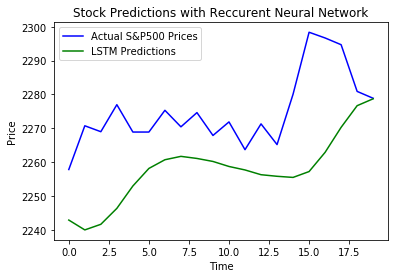

In [107]:
#plotting the results
plt.plot(testset, color='blue', label='Actual S&P500 Prices')
plt.plot(predictions, color='green', label='LSTM Predictions')
plt.title('Stock Predictions with Reccurent Neural Network')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()